In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [10]:
# 1. Crear datos sintéticos
np.random.seed(42)

edades = np.random.randint(18, 65, size=30)
ingresos = np.random.randint(1000, 10000, size=30)
niveles_educativos = np.random.choice(['secundaria', 'pregrado', 'posgrado'], size=30, p=[0.3, 0.5, 0.2])

# Generar etiquetas según regla: más ingreso y educación → más probabilidad de compra
compras = []
for edad, ingreso, educacion in zip(edades, ingresos, niveles_educativos):
    score = ingreso
    if educacion == 'posgrado':
        score += 1000
    elif educacion == 'secundaria':
        score -= 1000
    compras.append(1 if score > 6000 else 0)

# 2. Construir DataFrame
data = pd.DataFrame({
    'edad': edades,
    'educacion': niveles_educativos,
    'ingreso_mensual': ingresos,
    'compra': compras
})

data



,edad,educacion,ingreso_mensual,compra
0,56,pregrado,3558,0
1,46,pregrado,8849,1
2,32,pregrado,3047,0
3,60,secundaria,3747,0
4,25,posgrado,1189,0
5,38,pregrado,3734,0
6,56,posgrado,4005,0
7,36,posgrado,5658,1
8,40,pregrado,2899,0
9,28,posgrado,8734,1


In [11]:
# 3. Dividir variables
X = data[['edad', 'educacion', 'ingreso_mensual']]
y = data['compra']

In [12]:
X

,edad,educacion,ingreso_mensual
0,56,pregrado,3558
1,46,pregrado,8849
2,32,pregrado,3047
3,60,secundaria,3747
4,25,posgrado,1189
5,38,pregrado,3734
6,56,posgrado,4005
7,36,posgrado,5658
8,40,pregrado,2899
9,28,posgrado,8734


In [13]:
y

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     1
10    0
11    0
12    0
13    0
14    1
15    0
16    1
17    1
18    1
19    0
20    1
21    1
22    0
23    1
24    0
25    1
26    0
27    0
28    0
29    1
Name: compra, dtype: int64

- La línea `preprocesador = ColumnTransformer(...)` crea un objeto que prepara automáticamente los datos para el modelo, aplicando transformaciones distintas según el tipo de variable. 
- A las columnas numéricas como la edad y el ingreso mensual se les aplica `StandardScaler`, que estandariza sus valores para que tengan media 0 y desviación estándar 1, facilitando el aprendizaje del modelo. 
- A las columnas categóricas como el nivel educativo se les aplica `OneHotEncoder`, que convierte cada categoría en columnas binarias para que puedan ser procesadas por algoritmos de machine learning. El resultado es un conjunto de datos numéricos completamente transformado, listo para entrenar un clasificador.


In [17]:
# 4. Preprocesamiento: escalar y codificar
columnas_categoricas = ['educacion']
columnas_numericas = ['edad', 'ingreso_mensual']

preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), columnas_numericas),
    ('cat', OneHotEncoder(), columnas_categoricas)
])



In [ ]:
# 5. Pipeline con regresión logística
modelo = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('clasificador', LogisticRegression())
])

In [ ]:
# 6. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# 8. Predicción
y_pred = modelo.predict(X_test)
y_pred


array([0, 0, 1, 1, 0, 1])

In [28]:
y_test

27    0
15    0
23    1
17    1
8     0
9     1
Name: compra, dtype: int64

In [29]:
y_pred

array([0, 0, 1, 1, 0, 1])

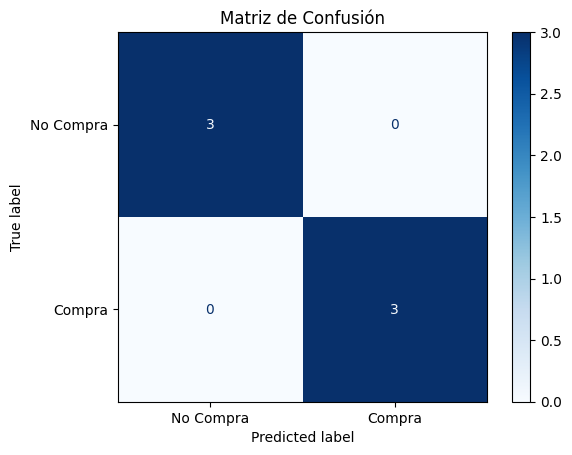

Precisión del modelo: 1.0


In [ ]:
# 9. Matriz de confusión (antes de métricas)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Compra', 'Compra'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()




In [23]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


# 10. Métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precisión (accuracy):", accuracy)
print("Sensibilidad (recall para clase 'Compra'):", recall)


Precisión (accuracy): 1.0
Sensibilidad (recall para clase 'Compra'): 1.0


### 📊 Supongamos esta estructura de la matriz de confusión:

|                         | Predijo No Compra (0) | Predijo Compra (1)   |
| ----------------------- | --------------------- | -------------------- |
| **Real: No Compra (0)** | True Negatives (TN)   | False Positives (FP) |
| **Real: Compra (1)**    | False Negatives (FN)  | True Positives (TP)  |

---

### ✅ Accuracy (Precisión global)

> **Accuracy** mide el porcentaje de predicciones correctas sobre el total de casos.

**Fórmula:**

```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```

---

### ✅ Recall (Sensibilidad o Tasa de verdaderos positivos)

> **Recall** mide qué porcentaje de los casos positivos reales fueron correctamente clasificados como positivos.

**Fórmula:**

```
Recall = TP / (TP + FN)
```

---

En resumen:

* `TP` = el modelo predijo "compra" y realmente fue "compra".
* `TN` = predijo "no compra" y realmente fue "no compra".
* `FP` = predijo "compra" pero en realidad fue "no compra".
* `FN` = predijo "no compra" pero en realidad fue "compra".

In [ ]:
# 10. Predicción para nuevo individuo
nuevo = pd.DataFrame({
    'edad': [35],
    'educacion': ['posgrado'],
    'ingreso_mensual': [7200]
})
resultado = modelo.predict(nuevo)
print("¿Comprará?", "Sí" if resultado[0] == 1 else "No")


¿Comprará? Sí
